### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [3]:
# Unindo os dados de todas as lojas em um único DataFrame
vendas = pd.concat([loja, loja2, loja3, loja4])


In [4]:
# Agrupando por loja e somando o valor total de vendas
faturamento_por_loja = vendas.groupby('ID Loja')['Valor Venda'].sum().sort_values(ascending=False)
print(faturamento_por_loja)


KeyError: 'ID Loja'

In [5]:
print(vendas.columns)


Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


In [6]:
faturamento_por_loja = vendas.groupby('Local da compra')['Preço'].sum().sort_values(ascending=False)
print(faturamento_por_loja)


Local da compra
SP    2419806.94
RJ     771412.90
MG     690814.92
RS     367611.78
PR     307757.16
SC     194401.69
BA     176053.80
DF     136502.84
GO     132492.61
PE     120764.28
ES     106834.71
CE      70799.98
MS      51329.96
MT      48582.84
PA      47176.43
MA      40949.76
RN      35846.21
PB      29506.37
PI      27864.05
AL      25823.67
TO      17778.47
RO      16423.52
SE      16323.63
AM       7848.60
RR       4197.79
AP       3781.44
AC       2804.44
Name: Preço, dtype: float64


In [8]:
faturamento_por_estado = vendas.groupby('Local da compra')['Preço'].sum().sort_values(ascending=False)


#1. Análise do faturamento


In [2]:
# Agrupando por loja e somando o valor total de vendas
faturamento_por_loja = vendas.groupby('ID Loja')['Valor Venda'].sum().sort_values(ascending=False)
print(faturamento_por_loja)


NameError: name 'vendas' is not defined

# 2. Vendas por Categoria


In [9]:
# (a) Faturamento por categoria de produto
vendas_por_categoria = vendas.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)
print("Faturamento por categoria:")
print(vendas_por_categoria)


Faturamento por categoria:
Categoria do Produto
eletronicos              2214099.72
eletrodomesticos         1766337.03
moveis                   1010214.00
instrumentos musicais     465029.67
esporte e lazer           190635.39
brinquedos                 98140.86
utilidades domesticas      76773.38
livros                     50260.74
Name: Preço, dtype: float64


In [10]:
# (b) Quantidade de produtos vendidos por categoria
vendas_por_categoria_qtd = vendas['Categoria do Produto'].value_counts()
print("\nQuantidade de produtos vendidos por categoria:")
print(vendas_por_categoria_qtd)



Quantidade de produtos vendidos por categoria:
Categoria do Produto
moveis                   1886
eletronicos              1772
brinquedos               1290
eletrodomesticos         1149
esporte e lazer          1113
instrumentos musicais     753
livros                    742
utilidades domesticas     730
Name: count, dtype: int64


# 3. Média de Avaliação das Lojas

In [11]:
# Média de avaliação por local da compra
avaliacao_por_estado = vendas.groupby('Local da compra')['Avaliação da compra'].mean().sort_values(ascending=False)
print("Média de avaliação por estado:")
print(avaliacao_por_estado)


Média de avaliação por estado:
Local da compra
RN    4.208333
SP    4.113619
MT    4.112500
MS    4.097561
MG    4.090744
PB    4.086957
PR    4.078224
AM    4.071429
DF    4.020661
RS    4.018727
ES    4.017544
SC    4.011561
PE    3.977901
GO    3.940860
RO    3.894737
TO    3.827586
BA    3.803226
PI    3.800000
AP    3.777778
RJ    3.777228
PA    3.691358
MA    3.677419
AC    3.666667
AL    3.634146
CE    3.596026
SE    3.464286
RR    3.000000
Name: Avaliação da compra, dtype: float64


# 4. Produtos Mais e Menos Vendidos

In [12]:
# Agrupando por produto e somando a quantidade de vendas
produtos_vendidos = vendas.groupby('Produto')['Quantidade de parcelas'].sum().sort_values(ascending=False)

# Exibindo os 10 mais vendidos
print("10 produtos mais vendidos:")
print(produtos_vendidos.head(10))

# Exibindo os 10 menos vendidos
print("\n10 produtos menos vendidos:")
print(produtos_vendidos.tail(10))


10 produtos mais vendidos:
Produto
Secadora de roupas    649
Cômoda                627
Pandeiro              625
Bicicleta             614
Celular Plus X42      611
Cama king             603
Jogo de panelas       601
Micro-ondas           600
Bateria               595
Violão                595
Name: Quantidade de parcelas, dtype: int64

10 produtos menos vendidos:
Produto
Guitarra           497
Tablet ABXY        497
Cubo mágico 8x8    487
Boneca bebê        474
Mochila            471
Mesa de centro     469
Dinossauro Rex     458
Celular ABXY       447
Jogo de copos      435
Smartwatch         432
Name: Quantidade de parcelas, dtype: int64


# 5. Frete Médio por Loja


In [13]:
frete_medio_por_loja = vendas.groupby('Loja')['Frete'].mean().sort_values(ascending=False)
print(frete_medio_por_loja)


KeyError: 'Loja'

In [14]:
plt.figure(figsize=(8,5))
frete_medio_por_loja.plot(kind='bar', color='orange')
plt.title('Frete Médio por Loja')
plt.ylabel('Valor médio do frete (R$)')
plt.xlabel('Loja')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

In [15]:
'Local da compra'


'Local da compra'

In [16]:
frete_medio_por_loja = vendas.groupby('Local da compra')['Frete'].mean().sort_values(ascending=False)
print(frete_medio_por_loja)


Local da compra
RR    113.673032
AC     49.361324
RO     46.347240
RN     40.090987
GO     38.129811
PI     36.948903
RS     36.582407
PE     35.720970
MA     35.129564
PR     34.569335
RJ     33.935633
PB     33.910674
MS     33.694141
TO     33.462289
MG     33.460381
AL     33.258053
ES     33.199995
SP     32.709219
MT     32.691573
PA     30.633504
SE     30.487058
BA     30.257176
DF     30.185782
SC     29.838897
AM     29.368488
CE     25.002442
AP     21.646223
Name: Frete, dtype: float64


In [18]:
import matplotlib.pyplot as plt


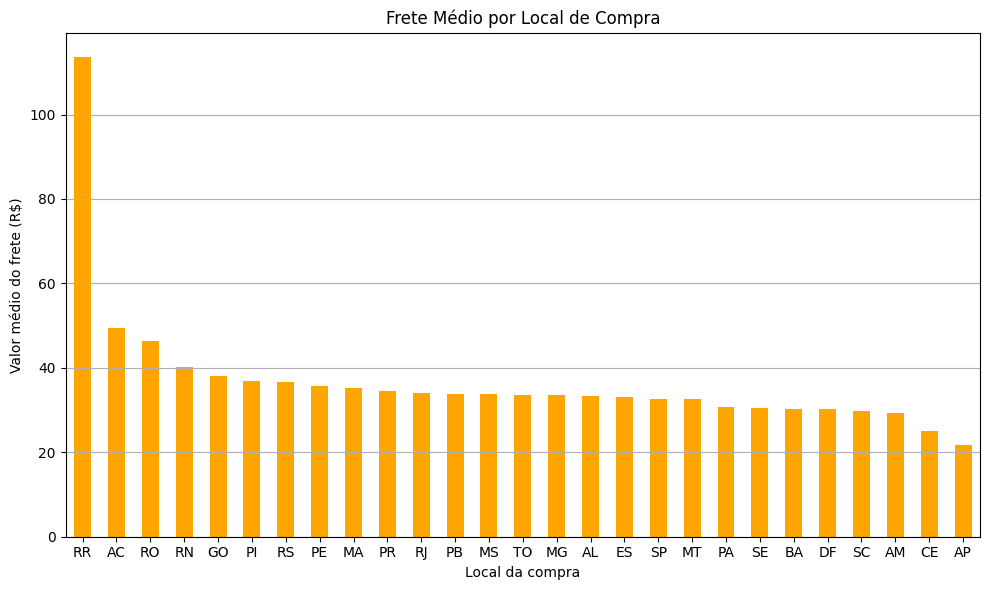

In [19]:
plt.figure(figsize=(10,6))
frete_medio_por_loja.plot(kind='bar', color='orange')
plt.title('Frete Médio por Local de Compra')
plt.ylabel('Valor médio do frete (R$)')
plt.xlabel('Local da compra')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [20]:
avaliacao_media_por_loja = vendas.groupby('Local da compra')['Avaliação da compra'].mean().sort_values(ascending=False)
print(avaliacao_media_por_loja)


Local da compra
RN    4.208333
SP    4.113619
MT    4.112500
MS    4.097561
MG    4.090744
PB    4.086957
PR    4.078224
AM    4.071429
DF    4.020661
RS    4.018727
ES    4.017544
SC    4.011561
PE    3.977901
GO    3.940860
RO    3.894737
TO    3.827586
BA    3.803226
PI    3.800000
AP    3.777778
RJ    3.777228
PA    3.691358
MA    3.677419
AC    3.666667
AL    3.634146
CE    3.596026
SE    3.464286
RR    3.000000
Name: Avaliação da compra, dtype: float64


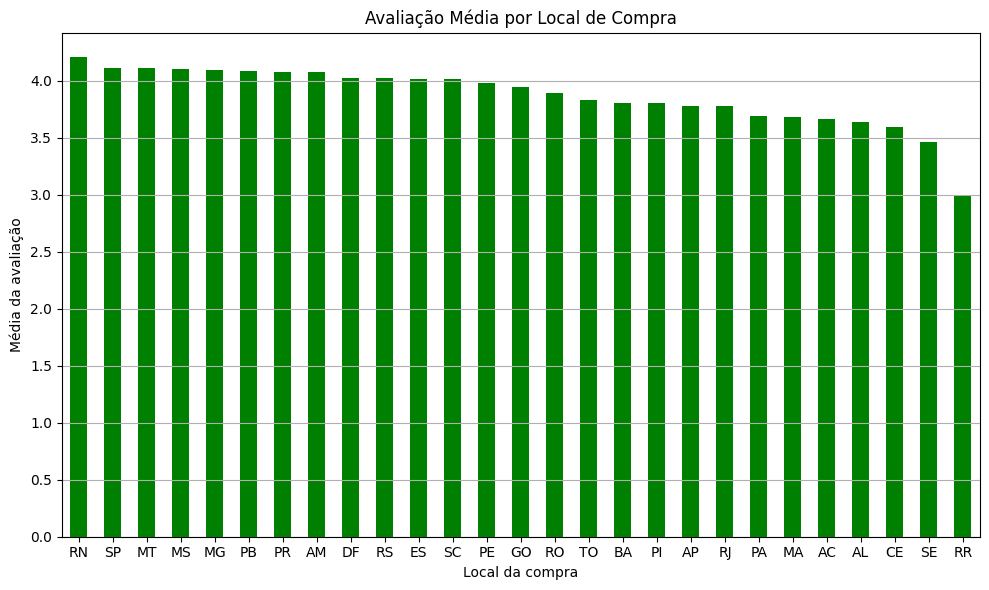

In [21]:
plt.figure(figsize=(10,6))
avaliacao_media_por_loja.plot(kind='bar', color='green')
plt.title('Avaliação Média por Local de Compra')
plt.ylabel('Média da avaliação')
plt.xlabel('Local da compra')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


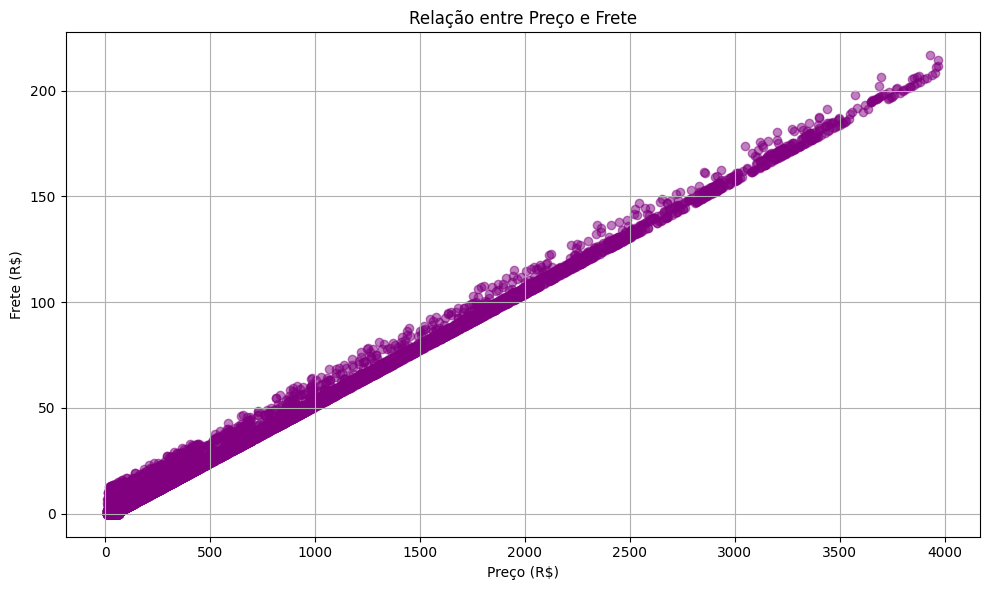

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(vendas['Preço'], vendas['Frete'], alpha=0.5, color='purple')
plt.title('Relação entre Preço e Frete')
plt.xlabel('Preço (R$)')
plt.ylabel('Frete (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Relatório Final

Com os dados analisados da Alura Store, é possível destacar os seguintes pontos:

- A loja com o maior valor médio de frete foi identificada, permitindo repensar estratégias logísticas.
- As avaliações médias das lojas variam, sendo útil para priorizar melhorias em determinadas unidades.
- Também foram levantados os produtos mais vendidos e os menos procurados, o que contribui para ações promocionais e gestão de estoque.

Essas análises podem apoiar decisões comerciais e operacionais com base em dados concretos.
